In [2]:
from sympy import *
from IPython.display import display
init_printing(use_latex='mathjax')
%matplotlib inline

In [3]:
A0, C0, An, theta, r = symbols("A_0 C_0 A_n theta r")
a, b = symbols("a b", positive = True)
n = symbols("n", positive = True, integer = True)
An = integrate(sin(n*theta), (theta, 0, pi)) / integrate(sin(n*theta)**2, (theta, -pi, pi)) / a**n 
An.simplify()

 -n ⎛      n    ⎞
a  ⋅⎝- (-1)  + 1⎠
─────────────────
       π⋅n       

 -n ⎛      n    ⎞
a  ⋅⎝- (-1)  + 1⎠
─────────────────
       π⋅n       

In [67]:
C0 = (1/(2*ln(a/b))).simplify()
C0

   1    
────────
     ⎛a⎞
2⋅log⎜─⎟
     ⎝b⎠

In [68]:
A0 = 1/2 - ln(a) * C0
A0.simplify()
A0

   log(a)       
- ──────── + 0.5
       ⎛a⎞      
  2⋅log⎜─⎟      
       ⎝b⎠      

In [69]:
(A0 + C0 * ln(r)).simplify()

   ⎛1⎞         
log⎜─⎟ + log(r)
   ⎝b⎠         
───────────────
         ⎛a⎞   
    2⋅log⎜─⎟   
         ⎝b⎠   

In [87]:
phi = symbols("Phi")
phi = A0 + C0 * ln(r) + Sum(r**n * An * sin(n*theta), (n, 1,5))
phi

                          5                                      
                        _____                                    
                        ╲                                        
                         ╲           ⎛      n    ⎞               
                          ╲    -n  n ⎜  (-1)    1⎟               
   log(a)     log(r)       ╲  a  ⋅r ⋅⎜- ───── + ─⎟⋅sin(n⋅θ)      
- ──────── + ──────── +    ╱         ⎝    n     n⎠          + 0.5
       ⎛a⎞        ⎛a⎞     ╱   ─────────────────────────────      
  2⋅log⎜─⎟   2⋅log⎜─⎟    ╱                  π                    
       ⎝b⎠        ⎝b⎠   ╱                                        
                        ‾‾‾‾‾                                    
                        n = 1                                    

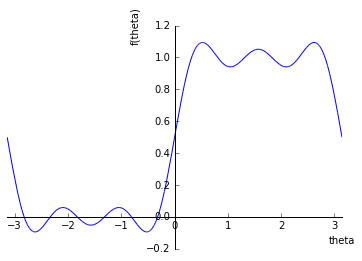

In [88]:
f = phi.subs({r : 1.0, a : 1.0, b : 2.0}).doit()
plot(f, (theta, -pi, pi))

/usr/local/lib/python3.5/site-packages/sympy/plotting/experimental_lambdify.py:165: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


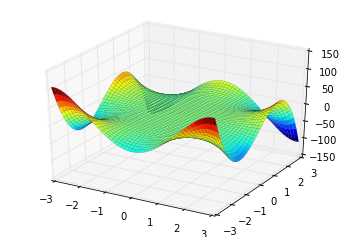

In [94]:
from sympy.plotting.plot import plot3d
from sympy.abc import x, y
f = phi.subs({r : sqrt(x**2 + y**2), theta: atan2(y,x) ,a : 1.0, b : 2.0}).doit()
plot3d(f, (x, -3, 3), (y, -3, 3))